# Auto Generated Agent Chat: GPTAssistant with Code Interpreter

The latest released Assistants API by OpenAI allows users to build AI assistants within their own applications. The Assistants API currently supports three types of tools: Code Interpreter, Retrieval, and Function calling. In this notebook, we demonstrate how to enable `GPTAssistantAgent` to use code interpreter.

## Requirements

AutoGen requires `Python>=3.9`. To run this notebook example, please install:

````{=mdx}
:::info Requirements
Install `autogen`:
```bash
pip install autogen
```

For more information, please refer to the [installation guide](/docs/installation/Installation).
:::
````


## Set your API Endpoint

The [`config_list_from_json`](https://docs.ag2.ai/docs/reference/oai/openai_utils#config-list-from-json) function loads a list of configurations from an environment variable or a json file.


In [1]:
import io

from IPython.display import display
from PIL import Image

import autogen
from autogen.agentchat import AssistantAgent, UserProxyAgent, ConversableAgent
from autogen.agentchat.contrib.gpt_assistant_agent import GPTAssistantAgent
from config import llm_config
import agentops

agentops.init()


filter_dict = {"model": ["gpt-4o-mini"]}
filtered_config = autogen.filter_config(llm_config["config_list"], filter_dict)
llm_config["config_list"] = filtered_config

🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=c08814da-00c1-4e0c-99c7-801ef05a777d


```{=mdx}
:::tip
Learn more about configuring LLMs for agents [here](/docs/topics/llm_configuration).
:::
```


## Perform Tasks Using Code Interpreter

We demonstrate task solving using `GPTAssistantAgent` with code interpreter. Pass `code_interpreter` in `tools` parameter to enable `GPTAssistantAgent` with code interpreter. It will write code and automatically execute it in a sandbox. The agent will receive the results from the sandbox environment and act accordingly.

### Example 1: Math Problem Solving

In this example, we demonstrate how to use code interpreter to solve math problems.


In [2]:
# Initiate an agent equipped with code interpreter
gpt_assistant = GPTAssistantAgent(
    name="Coder Assistant",
    llm_config=llm_config,
    assistant_config={"tools": [{"type": "code_interpreter"}]},
    instructions="You are an expert at solving math questions. Write code and run it to solve math problems. Reply TERMINATE when the task is solved and there is no problem.",
)

user_proxy = UserProxyAgent(
    name="user_proxy",
    is_termination_msg=lambda msg: "TERMINATE" in msg["content"],
    code_execution_config={
        "work_dir": "coding",
        "use_docker": True,  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    },
    human_input_mode="NEVER",
)

# When all is set, initiate the chat.
user_proxy.initiate_chat(gpt_assistant, message="If $725x + 727y = 1500$ and $729x+ 731y = 1508$, what is the value of $x - y$ ?")
gpt_assistant.delete_assistant()
agentops.end_session("Success")

OpenAI client config of GPTAssistantAgent(Coder Assistant) - model: gpt-4o-mini
No matching assistant found, creating a new assistant


user_proxy (to Coder Assistant):

If $725x + 727y = 1500$ and $729x+ 731y = 1508$, what is the value of $x - y$ ?

--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

The value of \( x - y \) is \(-48\). 

TERMINATE


--------------------------------------------------------------------------------


🖇 AgentOps: Session Stats - Duration: 30.6s | Cost: $0.00 | LLMs: 0 | Tools: 0 | Actions: 5 | Errors: 0
🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=9029a60c-1a8a-4c90-85de-aae399249614


### Example 2: Plotting with Code Interpreter

Code Interpreter can outputs files, such as generating image diagrams. In this example, we demonstrate how to draw figures and download it.


In [2]:
gpt_assistant = GPTAssistantAgent(
    name="Coder Assistant",
    llm_config=llm_config,
    assistant_config={"tools": [{"type": "code_interpreter"}]},
    instructions="You are an expert at writing python code to solve problems. Reply TERMINATE when the task is solved and there is no problem.",
)

user_proxy = UserProxyAgent(
    name="user_proxy",
    is_termination_msg=lambda msg: "TERMINATE" in msg["content"],
    code_execution_config={
        "work_dir": "coding",
        "use_docker": True,  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    },
    human_input_mode="NEVER",
)

result = user_proxy.initiate_chat(
    gpt_assistant,
    message="Draw a line chart to show the population trend in US. Show how you solved it with code.",
    is_termination_msg=lambda msg: "TERMINATE" in msg["content"],
    human_input_mode="NEVER",
    clear_history=True,
    max_consecutive_auto_reply=1,
)

OpenAI client config of GPTAssistantAgent(Coder Assistant) - model: gpt-4o-mini
No matching assistant found, creating a new assistant


user_proxy (to Coder Assistant):

Draw a line chart to show the population trend in US. Show how you solved it with code.

--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

Received file id=file-ScDaxumw1QqHyvFiBTw6ze

I've created a line chart to show the population trend in the US from 2000 to 2020. The step-by-step code I used is as follows:

1. **Import Libraries**: Imported necessary libraries (`matplotlib.pyplot`, `pandas`, `numpy`).
2. **Sample Data**: Created sample data representing the population of the US from 2000 to 2020.
3. **Create DataFrame**: Used pandas to create a DataFrame for organized data handling.
4. **Plotting**: Used `plt.plot` to create a line chart with years on the x-axis and population on the y-axis.
5. **Customization**: Added titles, labels, and grid for better visualization.

The resulting chart has been displayed above. 

TERMINATE


-------------------------------------------------------

In [3]:
import re
from autogen.agentchat import ChatResult


def extract_file_id(result: ChatResult):
    """Extract OpenAI file ID from text using regex pattern."""
    file_id_pattern = r"file-[A-Za-z0-9]{22}"
    match = re.search(file_id_pattern, result.summary)
    return match.group(0) if match else None


file_id = extract_file_id(result)

'file-ScDaxumw1QqHyvFiBTw6ze'

Now we have the file id. We can download and display it.


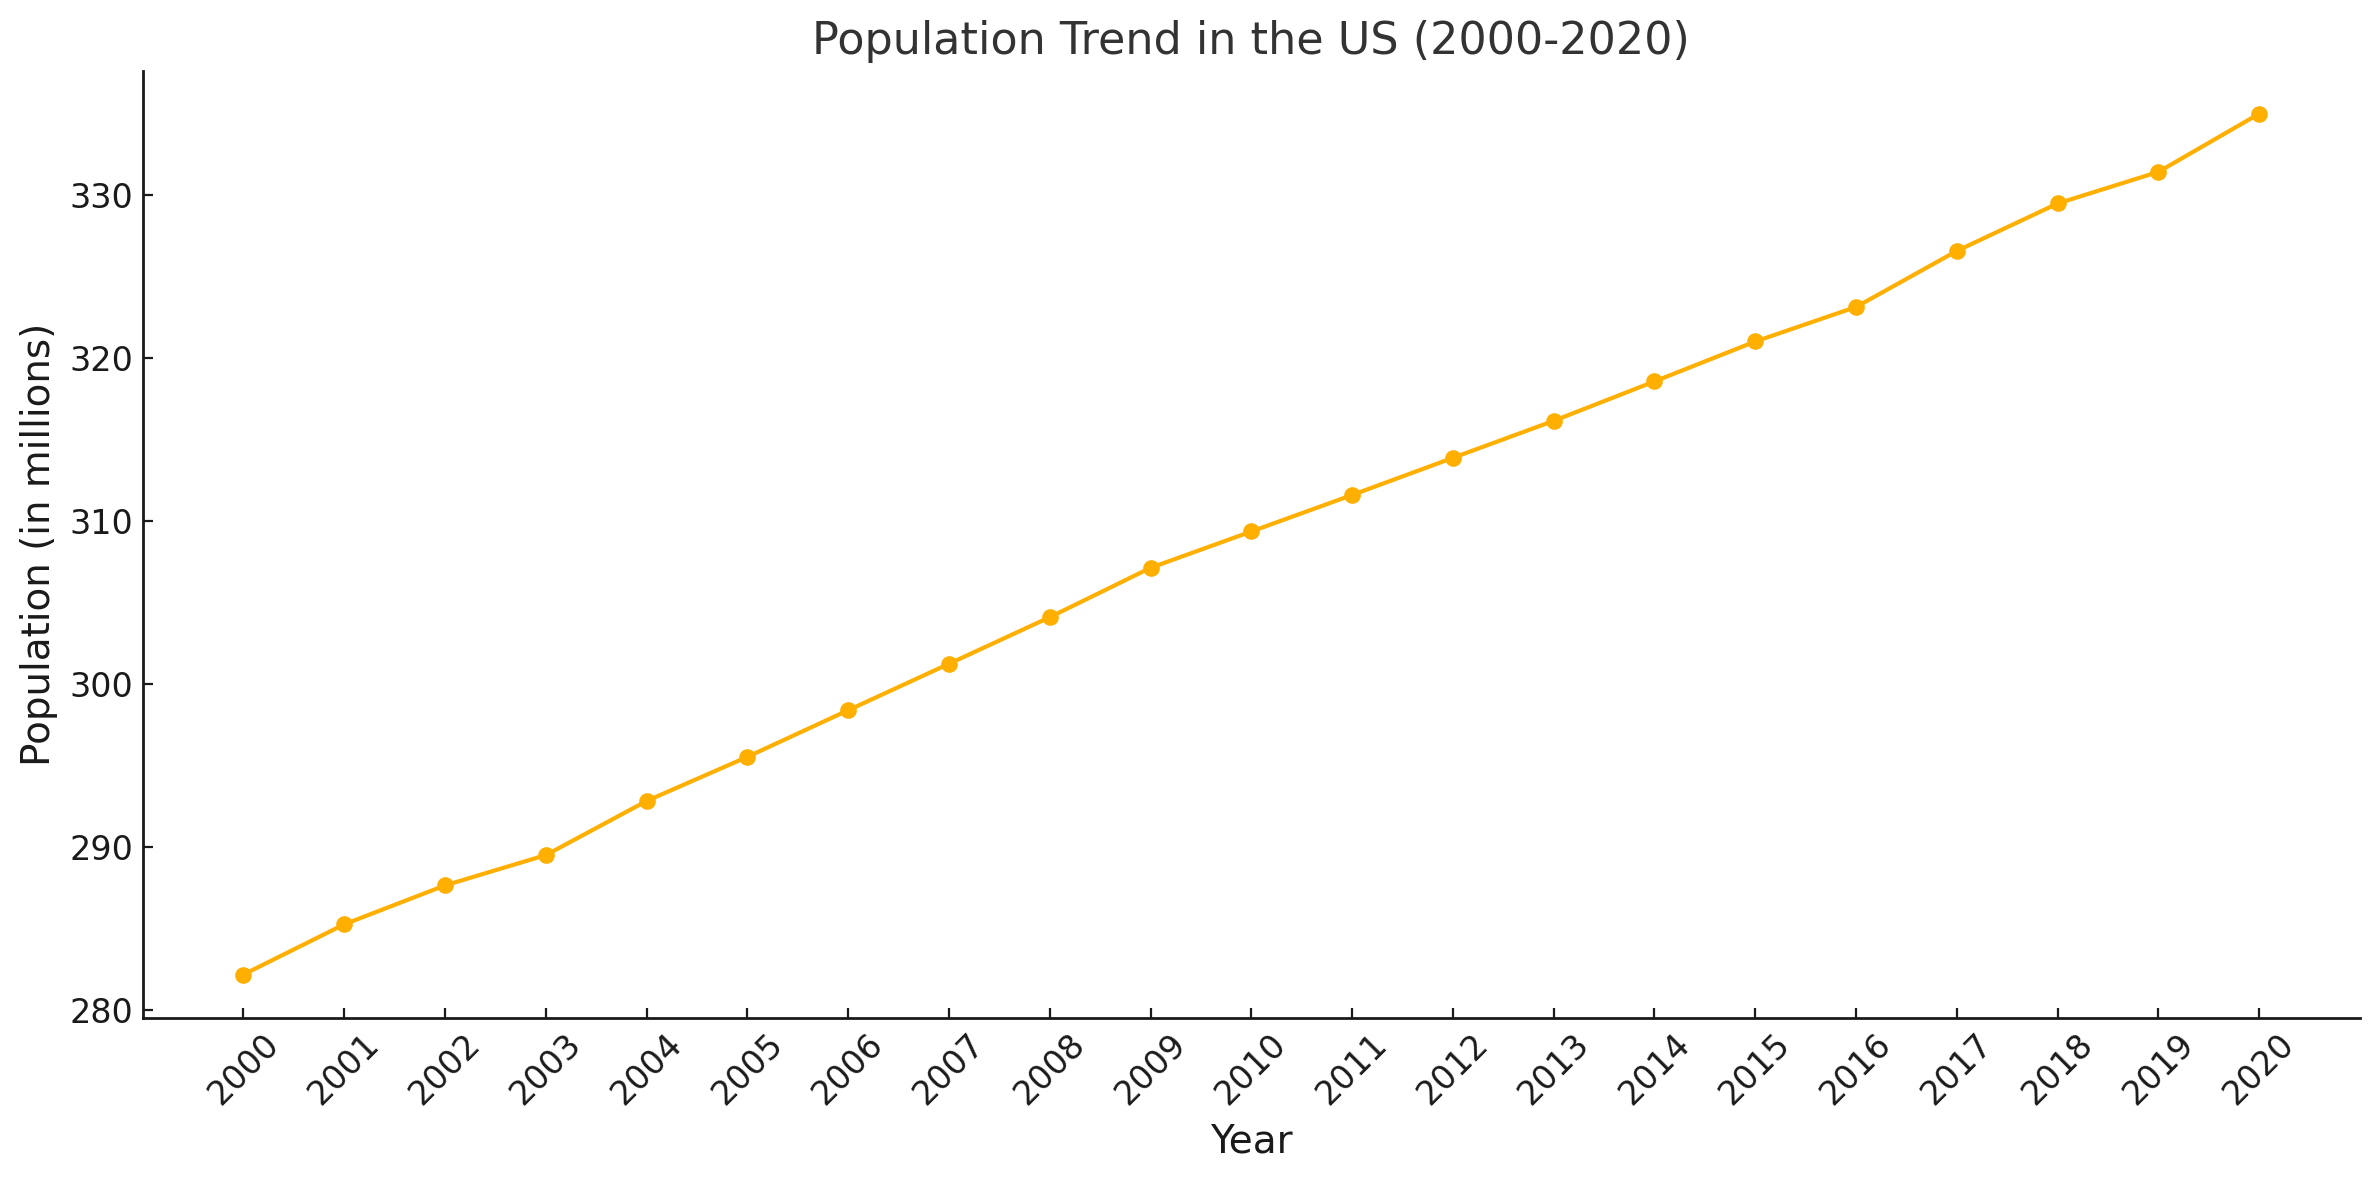

In [4]:
image_data = gpt_assistant.openai_client.files.content(file_id)
image_data_bytes = image_data.read()

image = Image.open(io.BytesIO(image_data_bytes))
display(image)

gpt_assistant.delete_assistant()
agentops.end_session("Success")